# Morphological Operators
### > These are set of specialized kernels which are achieve smoothing and blurring
### > Reduction in noise
### > Reduce black points on white back ground and vice -verse
### > Certain operators can also help in achieving erosion and dilation effect -  These are mostly seen on text data

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [32]:
def load_img():
    blank_img = np.zeros(shape=(600,600))
    font = cv2.FONT_HERSHEY_COMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300),fontFace=font,fontScale=5, color=(255,255,255),thickness=15)
    return blank_img

In [33]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

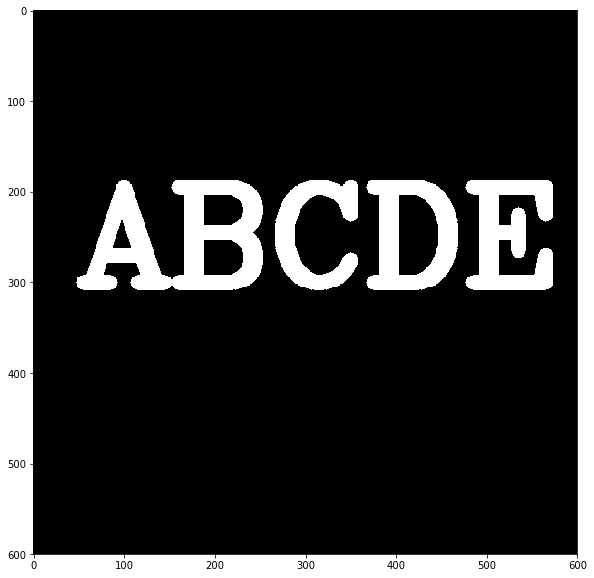

In [34]:
img = load_img()
display_img(img)

#### Using the Morphological Operators let us try to erode the background on the characters which are in white

In [35]:
kernel = np.ones(shape=(5,5),dtype=np.int8)

In [61]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=int8)

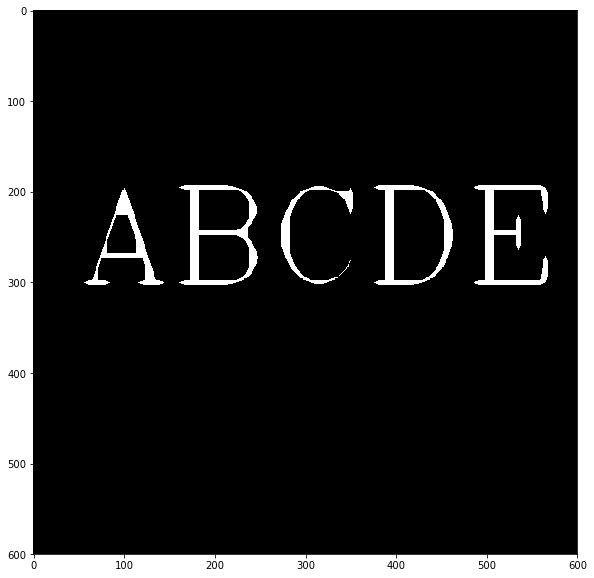

In [36]:
# iterations - number of times erosion is applied.
result = cv2.erode(img,kernel,iterations=3)
display_img(result)

# > iteration = 1 : Can we see any erotion in the above image from the original ? Yes, see the connection between A and B character, it was strong in the original image, seems to be reduced after applying erosion technique.

# > iteration = 3 : when you increase the value of number of iteration , you can clearly see that the character is completely eroded.

# Opening - next effect  (Opposite of erotion)

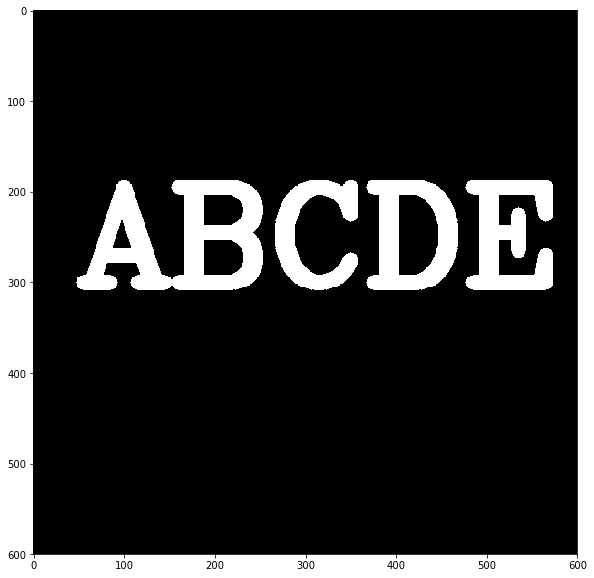

In [37]:
img = load_img()
display_img(img)

In [38]:
white_noise = np.random.randint(low = 0, high=2,size=(600,600))
white_noise

array([[1, 0, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0]])

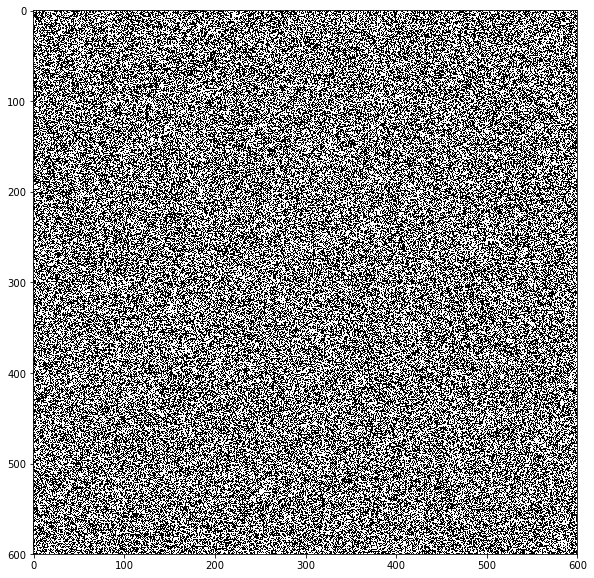

In [39]:
display_img(white_noise)

#### Now that we have created some sort of white noise, let us try to put this noise to our original image.

In [40]:
img.max()

255.0

In [41]:
# Now we need to convert the white noise values to map to our original image
white_noise = white_noise * 255

In [42]:
white_noise #same scale of the original image

array([[255,   0, 255, ..., 255,   0,   0],
       [  0, 255, 255, ..., 255,   0, 255],
       [255,   0,   0, ..., 255,   0,   0],
       ...,
       [255,   0, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [  0,   0,   0, ..., 255, 255,   0]])

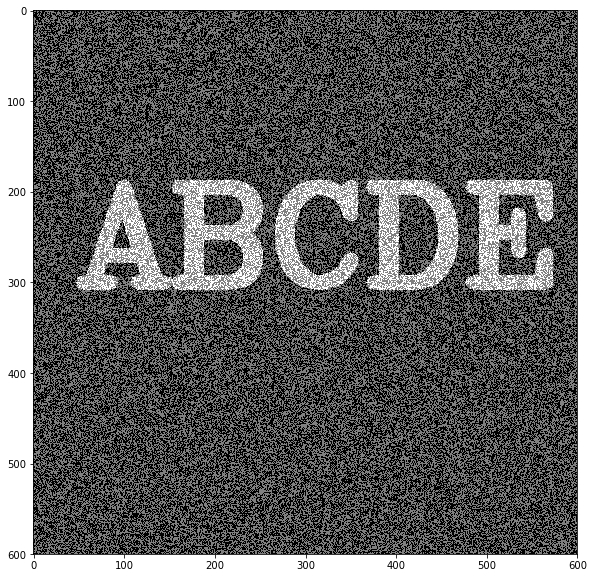

In [43]:
noise_img = white_noise + img
display_img(noise_img)

## Use opening (morphological operator) to get rig of the white noise - this is the background Noise

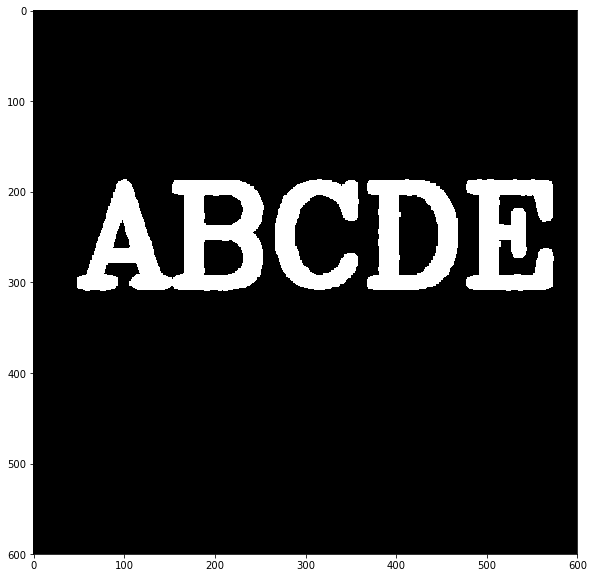

In [45]:
# we are using the same kernel as was used previously 
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)
display_img(opening)

# Foreground Noise

In [46]:
img = load_img()

In [47]:
black_noise = np.random.randint(low = 0,high=2,size=(600,600))

In [49]:
black_noise = black_noise * (-255)

In [50]:
 black_noise

array([[   0, -255,    0, ...,    0,    0,    0],
       [-255, -255, -255, ..., -255, -255, -255],
       [   0, -255, -255, ..., -255, -255,    0],
       ...,
       [   0,    0, -255, ..., -255,    0, -255],
       [   0,    0, -255, ..., -255,    0, -255],
       [   0, -255, -255, ..., -255, -255, -255]])

In [51]:
noise_img_blk = img + black_noise

In [53]:
noise_img_blk

array([[   0., -255.,    0., ...,    0.,    0.,    0.],
       [-255., -255., -255., ..., -255., -255., -255.],
       [   0., -255., -255., ..., -255., -255.,    0.],
       ...,
       [   0.,    0., -255., ..., -255.,    0., -255.],
       [   0.,    0., -255., ..., -255.,    0., -255.],
       [   0., -255., -255., ..., -255., -255., -255.]])

In [54]:
noise_img_blk[noise_img_blk == -255] = 0

In [55]:
noise_img_blk

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

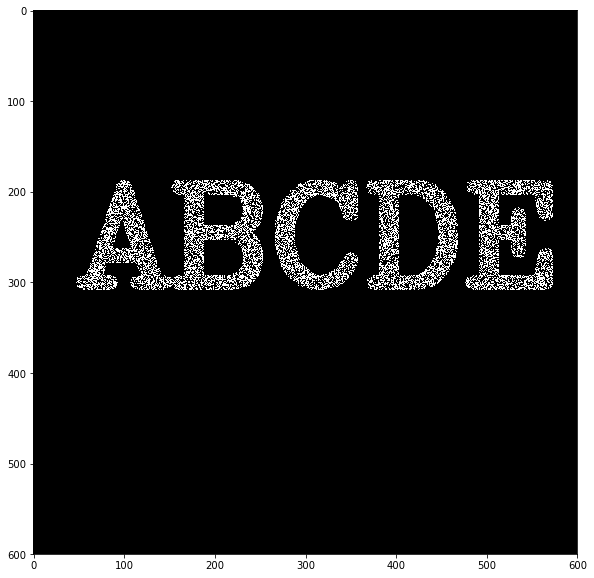

In [56]:
display_img(noise_img_blk)

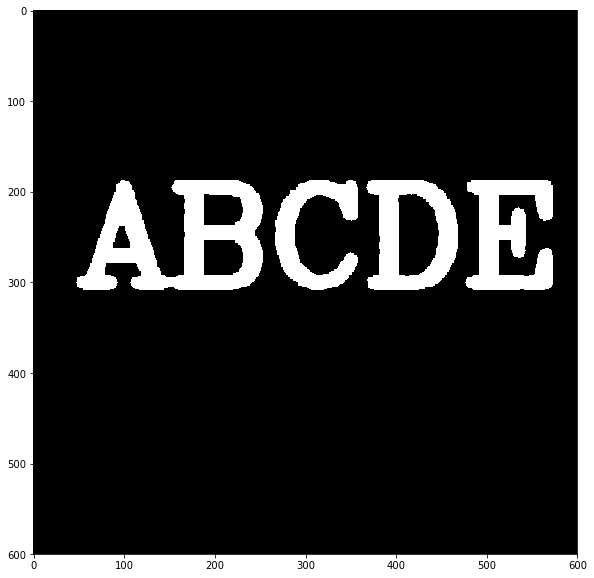

In [57]:
closing = cv2.morphologyEx(noise_img_blk,cv2.MORPH_CLOSE,kernel)
display_img(closing)

# Morphological Gradian :  Takes the difference of erotion and dilation of the image

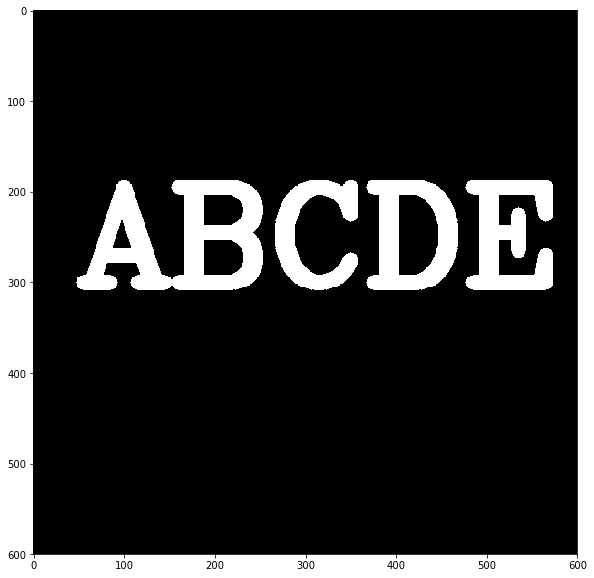

In [58]:
img = load_img()
display_img(img)

In [59]:
# This is kind of method of edge detection

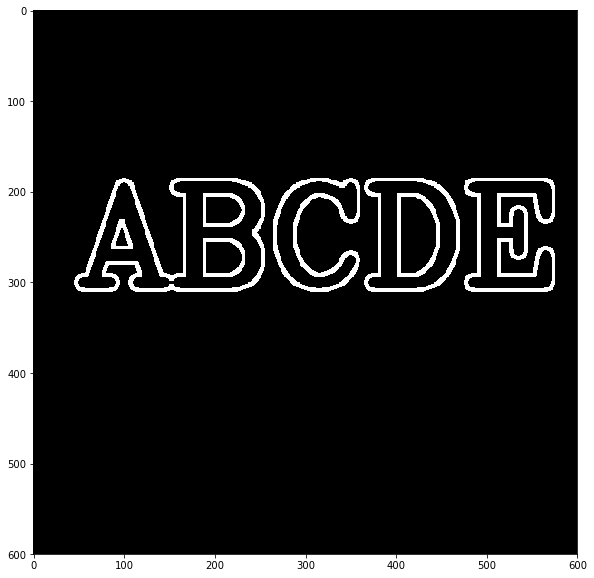

In [60]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(gradient)

# From the above you can see how this was able to capture the edges from the original image -  This is one of the method of edge detection using gradient.